<a href="https://colab.research.google.com/github/paulcesarbaruk/Analsying-the-Salary-of-Data-Scientists/blob/main/SQL_com_Python_e_SQLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

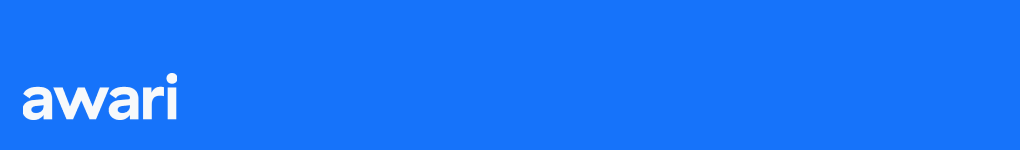

Prática da **Aula 06: Coleta de Dados II**, do curso de **Data Science** da **[Awari](https://awari.com.br/)**. Para utilizá-la, vá no menu "Arquivo" e, em seguida, na opção "Salvar uma cópia no Drive". Isto criará uma cópia deste notebook em uma pasta chamada "Colab Notebooks", no seu Google Drive pessoal. Use a cópia para criar novas células de código ou executar as células desta prática.

---

# **SQL com Python e SQLite**

## **O que é SQL?**

**SQL** significa *Structured Query Language*, ou "Linguagem de Consulta Estruturada". Resumidamente, é uma linguagem de programação para lidar com banco de dados relacionais (baseado em tabelas).

## **O que é SQLite?**

**SQLite** é um banco de dados relacional que, diferentemente de outras ferramentas do tipo, não armazena informações em um servidor.

Essa independência acontece porque ele consegue colocar os seus arquivos dentro de si próprio.

A documentação de SQLite está disponível em: https://docs.python.org/3/library/sqlite3.html.

## **SQL com SLite na prática**

A partir daqui, vamos importar o SQLite e aprender como usar a linguagem SQL.

Note que SQL não é usada apenas no banco de dados SQLite, mas em qualquer banco de dados relacional, como MySQL, Postgres, entre outros.

Aprendê-la, portanto, garante meios de lidar com diversos softwares de bancos de dados.

### **Instalação e importação de pacotes**

O primeiro passo é instalar as bibliotecas **Pandas** e **SQLite** para uso nesta prática:

In [1]:
# Importando Pandas e SQLite3
import pandas as pd
import sqlite3

O passo a seguir será necessário para etapas adiante nesta nossa prática. Ele instala um recurso para podermos ler arquivos do Microsoft Excel (com a extensão ".xls") no Google Colab.

In [2]:
# Instalando recurso para ler ".xls" no Google Colab
!pip install --upgrade xlrd

Com isto, podemos começar a praticar.

### **Criando um banco de dados no SQLite3**

O SQLite3 é um sistema de banco de dados. Para usá-lo, precisamos, primeiro, criar um banco de dados dentro dele para uso. Fazemos isso da seguinte forma:

In [3]:
# Seta conexão com o SQLite
con  = sqlite3.connect('teste.db')

In [4]:
# Cria um cursor (recurso do SQLite) para executar instruções SQL
cur = con.cursor()

### **Criando tabelas no banco de dados**

Agora, podemos criar tabelas no banco de dados. A sintaxe (forma de escrita) em SQL para isso está descrita a seguir.

**Sintaxe:**

```
CREATE TABLE nome_da_tabela (
    coluna1 tipo_dados,
    coluna2 tipo_dados,
    coluna3 tipo_dados,
   ....
)
```

Os parâmetros ```coluna``` especificam os nomes das colunas da tabela, enquanto os parâmetros ```tipo_dados``` especifica o tipo de dados que a coluna pode conter (por exemplo, ```varchar``` para sequências de caracteres, ```integer``` para números inteiros, ```date``` para datas etc.).

Usamos o método `execute` do cursor para executar instruções.

In [5]:
# Criando uma tabela
cur.execute(
    'CREATE TABLE teste ( nome varchar, idade integer, cpf integer(11) )'
)

# Confirmando a criação da tabela
con.commit()

In [6]:
# Criando outra tabela
cur.execute(
    'CREATE TABLE outratabela ( nome varchar, idade integer, cpf integer(11) )'
)

# Confirmando a criação desta outra tabela
con.commit()

#### **Verificando se as tabelas foram criadas**

Podemos verificar se a nova tabela foi criada consultando a tabela incorporada ao SQLite chamada `sqlite_master`, que agora deve conter uma entrada `teste`.

Utilizaremos o método `fetchall()` para retornar todas as linhas de um resultado de uma consulta dentro de uma lista.

In [7]:
# Verificando se as tabelas foram criadas
cur.execute("SELECT name FROM sqlite_master").fetchall()

[('teste',), ('outratabela',)]

### **CRUD (*Create*, *Read*, *Update*, *Delete*)**

A seguir, vamos ver as quatro operações fundamentais feitas em bancos de dados, apelidada de **CRUD**, iniciais das seguintes ações:

- **C**reate: ato de criar (ou inserir) dados em um banco de dados;
- **R**read: ato de ler (ou "selecionar" ou, ainda, exibir) dados registrados um banco de dados;
- **U**pdate: ato de atualizar (alterar, modificar, substituir etc.) dados registrados um banco de dados;
- **D**elete: ato de excluir dados registrados um banco de dados.

#### **Inserindo dados em uma tabela já criada**

```INSERT INTO``` é a instrução SQL usada para inserir novos registros em uma tabela. É a ação *create* do CRUD.

**Sintaxe:**

```
INSERT INTO nome_da_tabela  (coluna1, coluna2, coluna3, ...)
```

In [8]:
## Inserindo dados na tabela "testes"
cur.execute("""
          INSERT INTO teste VALUES
            ('Fulano de tal', 35, 12345678910),
            ('Fulana Ana', 40, 12345678911)
          """)

## Confirmando a ação
con.commit()

#### **Selecionando registros de uma tabela**

```SELECT``` é a instrução SQL para selecionar dados de um banco de dados. É a ação *read* do CRUD.

**Sintaxe:**

```
SELECT * FROM nome_da_tabela
SELECT coluna1, coluna1, coluna3, ... FROM nome_da_tabela
```

In [9]:
# Exibindo todos os registros da tabela teste
cur.execute("SELECT * FROM teste").fetchall()

[('Fulano de tal', 35, 12345678910), ('Fulana Ana', 40, 12345678911)]

In [10]:
# Exibindo apenas os registros "nome" e "idade" da tabela teste
cur.execute("SELECT nome, idade FROM teste").fetchall()

[('Fulano de tal', 35), ('Fulana Ana', 40)]

#### **Atualizando dados de uma tabela**

```UPDATE``` é a instrução SQL para modificar os registros existentes em uma tabela. É a ação *update* do CRUD.

**Sintaxe:**

```
UPDATE nome_da_tabela
SET coluna_que_deseja_mudar = 'novo_valor'
WHERE coluna_condicional IS NOT NULL
```

In [11]:
# Atualizando dados da tabela teste
cur.execute(
'''
UPDATE teste
SET idade = '36'
WHERE nome = 'Fulano de tal'
'''
).fetchall()

[]

In [12]:
# Exibindo a atualização realizada
cur.execute(
'''
SELECT idade
FROM teste
WHERE nome = 'Fulano de tal'
'''
).fetchall()

[(36,)]

#### **Deletando dados em tabelas**

```DELETE``` é a instrução usada para excluir registros existentes em uma tabela. É a ação *delete* do CRUD.

**Sintaxe:**

```
DELETE from nome_da_tabela
WHERE coluna_desejada = 'valor_condição_para_exclusão'
```

In [13]:
# Excluindo registros de uma tabela
cur.execute(
'''
DELETE from teste
WHERE nome = 'Fulana Ana'
'''
).fetchall()

[]

In [14]:
# Excluindo todos os registros que restaram na tabela
cur.execute(
'''
SELECT *
FROM teste
'''
).fetchall()

[('Fulano de tal', 36, 12345678910)]

## **Usando Pandas para realizar consultas**

A partir daqui, vamos usar o Pandas, em conjunto com o SQLite, para realizar operações no banco de dados.

Para isso, primeiro, vamos importar um arquivo ".xls" (formato do Microfost Excel), com o qual alimentaremos um banco de dados.

### **Importando arquivo .xls**

O arquivo que usaremos se chama [Global Store.xls](https://docs.google.com/spreadsheets/d/197zdFw9qpF4tyEBt-hu2NjJBRkbJm4b-/edit?usp=share_link&ouid=116814618168396531193&rtpof=true&sd=true). Clique no link para acessá-lo.

Você pode copiá-lo para seu Google Drive ou fazer download dele para seu computador e depois fazer upload para o Google Drive.

Lembre-se de salvá-lo ou fazer upload na pasta raiz (pasta inicial) de seu Google Drive ou dentro da pasta "Colab Notebooks", já que facilita o uso no Colab.

**Também no Kaggle**

O arquivo também está disponível no Kaggle, como [Global Superstore](https://www.kaggle.com/datasets/shekpaul/global-superstore), um conjunto de dados disponível para análises estatísticas e visualizações.

Lá, porém, o arquivo está em formato ".zip" e é necessário descompactá-lo para poder usá-lo.

#### **Montagem do drive**

Para acessarmos arquivos do Google Drive no Colab, é preciso repetir os passos vistos na aula anterior, relativos à montagem do drive. Para isso, executamos:

In [15]:
# Carrega biblioteca necessária
from google.colab import drive

# Montagem do drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#### **Carregando o arquivo "Global Superstore.xls"**

Vamos, então, carregar o arquivo "Global Superstore.xls" para um DataFrame do Pandas:

In [16]:
# Carregando a primeira aba da planilha
df_orders = pd.read_excel('/content/drive/MyDrive/Global Superstore.xls', sheet_name = 0)

# Exibindo as colunas e primeiras linhas do DataFrame
df_orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [17]:
# Carregando a segunda aba da planilha
df_returns = pd.read_excel('/content/drive/MyDrive/Global Superstore.xls', sheet_name=1)

# Exibindo as colunas e primeiras linhas do DataFrame
df_returns.head()

,Returned,Order ID,Market
0,Yes,MX-2013-168137,LATAM
1,Yes,US-2011-165316,LATAM
2,Yes,ES-2013-1525878,EU
3,Yes,CA-2013-118311,United States
4,Yes,ES-2011-1276768,EU


In [18]:
# Carregando a terceira aba da planilha
df_people = pd.read_excel('/content/drive/MyDrive/Global Superstore.xls', sheet_name=2)

# Exibindo as colunas e primeiras linhas do DataFrame
df_people.head()

,Person,Region
0,Anna Andreadi,Central
1,Chuck Magee,South
2,Kelly Williams,East
3,Matt Collister,West
4,Deborah Brumfield,Africa


Abaixo, vamos fazer alguma limpeza e transformação de dados para facilitar o uso deles.

Na prática, estamos substituindo espaços em branco por underlines (```_```) e hífens por vírgulas, no DataFrames que criamos com os dados da planilha.

In [19]:
# Limpando e transformando dados para facilitar o uso
df_orders.columns = df_orders.columns.str.replace(' ', '_').str.replace('-','').str.lower()
df_returns.columns = df_returns.columns.str.replace(' ', '_').str.replace('-','').str.lower()
df_people.columns = df_people.columns.str.replace(' ', '_').str.replace('-','').str.lower()

### **Conectando o SQLite e criando tabelas a partir dos DataFrames**

In [20]:
# Conectando-se ao SQLite
bd = sqlite3.connect('superstore.db')

# Criando tabelas nos bancos de dados a partir dos nossos DataFrames
df_orders.to_sql('orders', bd, index=False, if_exists='replace')
df_returns.to_sql('returns', bd, index=False, if_exists='replace')
df_people.to_sql('people', bd, index=False, if_exists='replace')

13

In [21]:
# Criando uma função para facilitar instruções SQL
def executaQuery(query):
  return pd.read_sql(query,bd)

A partir daqui, podemos executar SQL dentro do Pandas, o que torna nosso trabalho muito mais fluido.

### **Comandos básicos SQL**

Estes são os comandos básicos do SQL. Praticaremos cada um na sequência.

* SELECT
* FROM
* LIMIT
* ALIAS
* WHERE
* AND, OR, NOT
* IN
* LIKE
* BETWEEN
* DISTINCT
* MIN, MAX, COUNT, AVG e SUM
* ORDER BY
* GROUP BY
* JOINS

Detalhe: não é obrigatório escrever os comandos em letras maiúsculas, mas, por convenção da comunidade mundial de SQL, ao longo de décadas, tornou-se padrão usar sempre maísculas. Por isso, manteremos tal convenção.

#### **SELECT e FROM**

- Os principais comandos de consulta SQL são `SELECT` e `FROM`:
    
- `SELECT` seleciona as colunas que queremos trazer
- `FROM` seleciona a tabela que analisaremos

Usar um asterisco (`*`) com ```SELECT```  permite selecionar toda das colunas.

In [25]:
# Usando SELECT * FROM
executaQuery('SELECT * FROM orders')

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,subcategory,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,32298,CA-2012-124891,2012-07-31 00:00:00,2012-07-31 00:00:00,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical
1,26341,IN-2013-77878,2013-02-05 00:00:00,2013-02-07 00:00:00,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,25330,IN-2013-71249,2013-10-17 00:00:00,2013-10-18 00:00:00,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,13524,ES-2013-1579342,2013-01-28 00:00:00,2013-01-30 00:00:00,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,47221,SG-2013-4320,2013-11-05 00:00:00,2013-11-06 00:00:00,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19 00:00:00,2014-06-19 00:00:00,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2014-06-20 00:00:00,2014-06-24 00:00:00,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2013-12-02 00:00:00,2013-12-02 00:00:00,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18 00:00:00,2012-02-22 00:00:00,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium


#### **LIMIT**

Para facilitar a consulta, podemos aplicar `LIMIT`, que define o número de linhas que a query irá trazer.

Podemos usar `LIMIT` para mostrar as primeiras `n` linhas:

In [29]:
# Usando LIMITE com SELECT
executaQuery('SELECT * FROM orders LIMIT 5')

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,subcategory,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,32298,CA-2012-124891,2012-07-31 00:00:00,2012-07-31 00:00:00,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05 00:00:00,2013-02-07 00:00:00,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17 00:00:00,2013-10-18 00:00:00,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28 00:00:00,2013-01-30 00:00:00,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05 00:00:00,2013-11-06 00:00:00,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


Se não quisermos trazer todas as colunas, podemos trazer as colunas desejadas uma a uma, separadas por vírgulas:

In [31]:
# Selecionado as colunas "cliente" (customer_name) e "cidade" (city)
consulta = '''
           SELECT customer_name,
                  city,
                  category,
                  subcategory

           FROM orders
           LIMIT 5
           '''
executaQuery(consulta)

,customer_name,city,category,subcategory
0,Rick Hansen,New York City,Technology,Accessories
1,Justin Ritter,Wollongong,Furniture,Chairs
2,Craig Reiter,Brisbane,Technology,Phones
3,Katherine Murray,Berlin,Technology,Phones
4,Rick Hansen,Dakar,Technology,Copiers


In [32]:
# Selecionando todas as categorias
consulta = '''
           SELECT category
           FROM orders
           '''
executaQuery(consulta)

,category
0,Technology
1,Furniture
2,Technology
3,Technology
4,Technology
...,...
51285,Office Supplies
51286,Office Supplies
51287,Office Supplies
51288,Office Supplies


#### **ALIAS**

Aliases SQL são usados ​​para fornecer um nome temporário a uma tabela ou coluna de uma tabela.

São úteis para tornar nomes de colunas mais legíveis e ficam disponiveis uma determinada consulta por meio do comando `AS`.

**Sintaxe:**

```
SELECT coluna1 AS col1,
       coluna2 AS col2
FROM nome_da_tabela
```

In [33]:
# Selecionado as colunas "cliente" (customer_name) e "cidade" (city) com ALIAS (AS)
consulta = '''
           SELECT customer_name AS name,
                  city
           FROM orders
           LIMIT 5
           '''
executaQuery(consulta)

,name,city
0,Rick Hansen,New York City
1,Justin Ritter,Wollongong
2,Craig Reiter,Brisbane
3,Katherine Murray,Berlin
4,Rick Hansen,Dakar


#### **WHERE**


A cláusula ou comando `WHERE` permite filtar registros. Dentro dela, também temos algumas condições que podemos executar.

##### **Igual `=`**

O símbolo `=` significa "igualdade", ou seja, selecionaremos todos os registros que sejam iguais ao valor informado.

In [34]:
# Selecionar todas as linhas onde a categoria for igual a "Technology"
consulta = '''
           SELECT *
           FROM orders
           WHERE category = 'Technology'
           LIMIT 5
           '''
executaQuery(consulta)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,subcategory,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,32298,CA-2012-124891,2012-07-31 00:00:00,2012-07-31 00:00:00,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,25330,IN-2013-71249,2013-10-17 00:00:00,2013-10-18 00:00:00,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
2,13524,ES-2013-1579342,2013-01-28 00:00:00,2013-01-30 00:00:00,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
3,47221,SG-2013-4320,2013-11-05 00:00:00,2013-11-06 00:00:00,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
4,22732,IN-2013-42360,2013-06-28 00:00:00,2013-07-01 00:00:00,Second Class,JM-15655,Jim Mitchum,Corporate,Sydney,New South Wales,...,TEC-PH-10000030,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.2750,897.35,Critical


##### **Diferente `<>`**

O símbolo `<>` significa "diferente", ou seja, selecionaremos todos os registros que sejam diferentes do valor informado.

In [36]:
# Selecionar todas as linhas onde a categoria for diferente a "Technology"
consulta = '''
           SELECT *
           FROM orders
           WHERE category <> 'Technology'
           LIMIT 2
           '''
executaQuery(consulta)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,subcategory,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,26341,IN-2013-77878,2013-02-05 00:00:00,2013-02-07 00:00:00,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.765,923.63,Critical
1,30570,IN-2011-81826,2011-11-07 00:00:00,2011-11-09 00:00:00,First Class,TS-21340,Toby Swindell,Consumer,Porirua,Wellington,...,FUR-CH-10004050,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.080,4,0.0,564.840,894.77,Critical


##### **Maior `>`**

O símbolo `>` significa "maior que", ou seja, selecionaremos todos os registros que sejam maiores do que valor informado.

In [37]:
# Selecionar todas as linhas onde a quantidade seja maior que 10
consulta = '''
           SELECT quantity
           FROM orders
           WHERE quantity > 10
           LIMIT 5
           '''
executaQuery(consulta)

,quantity
0,13
1,12
2,14
3,12
4,13


##### **Maior ou Igual `>=`**

`>=` significa "igual ou maior que", ou seja, selecionaremos todos os registros que sejam iguais ou maiores do que valor informado.

In [38]:
# Selecionar todas as linhas onde a quantidade seja maior ou igual a 10
consulta = '''
           SELECT quantity
           FROM orders
           WHERE quantity >= 10
           LIMIT 5
           '''
executaQuery(consulta)

,quantity
0,13
1,12
2,14
3,10
4,12


##### **Menor `<`**

O símbolo `<` significa "menor que", ou seja, selecionaremos todos os registros que sejam menores do que valor informado.

In [39]:
# Selecionar todas as linhas onde a quantidade seja menor que 10
consulta = '''
           SELECT quantity
           FROM orders
           WHERE quantity < 10
           LIMIT 10
           '''
executaQuery(consulta)

,quantity
0,7
1,9
2,9
3,5
4,8
5,5
6,4
7,6
8,5
9,5


##### **Menor ou Igual `<=`**

O símbolo `<=` significa "igual ou menor que", ou seja, selecionaremos todos os registros que sejam iguais ou menores do que valor informado.

In [40]:
# Selecionar todas as linhas onde a quantidade seja menor ou igual a 10
consulta = '''
           SELECT quantity
           FROM orders
           WHERE quantity <= 10
           LIMIT 10
           '''
executaQuery(consulta)

,quantity
0,7
1,9
2,9
3,5
4,8
5,5
6,4
7,6
8,5
9,5


##### **BETWEEN**

`BETWEEN` significa "entre", ou seja, selecionaremos todos os registros que estejam entre os valores informados.

In [41]:
# Selecionar todas as linhas onde valor de venda esteja entre 3000 e 6000
consulta = '''
           SELECT sales
           FROM orders
           WHERE sales BETWEEN 3000 AND 6000
           LIMIT 5
           '''
executaQuery(consulta)

,sales
0,3709.395
1,5175.171
2,5244.840
3,5083.960
4,4297.644


##### **AND**

`AND` significa "e", ou seja, podemos concatenar duas ou mais condições, onde ambas tem que ser verdadeiras para que o retorno seja positivo.

In [42]:
# Selecionar todas as linhas onde a categoria for igual a Technology e a cidade for igual a Valinhos
consulta = '''
           SELECT *
           FROM orders
           WHERE category = 'Technology'
           AND city = 'Valinhos'
           '''
executaQuery(consulta)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,subcategory,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,5163,MX-2013-132269,2013-06-19 00:00:00,2013-06-23 00:00:00,Standard Class,AS-10090,Adam Shillingsburg,Consumer,Valinhos,São Paulo,...,TEC-CO-10004171,Technology,Copiers,"Sharp Fax and Copier, Digital",447.74272,4,0.002,178.54272,59.641,High
1,9593,MX-2012-140767,2012-02-18 00:00:00,2012-02-22 00:00:00,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,TEC-AC-10000376,Technology,Accessories,"Memorex Router, Bluetooth",820.70000,5,0.000,352.90000,52.514,Medium
2,9592,MX-2012-140767,2012-02-18 00:00:00,2012-02-22 00:00:00,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,TEC-MA-10004985,Technology,Machines,"StarTech Card Printer, Durable",436.32000,4,0.000,4.32000,11.237,Medium


##### **OR**

`AND` significa "ou", ou seja, podemos concatenar duas ou mais condições, onde basta uma das condições ser verdadeira para que o retorno seja positivo.

In [43]:
# Selecionar todas as linhas onde a categoria for igual a Technology ou a cidade for igual a Valinhos
consulta = '''
           SELECT *
           FROM orders
           WHERE category = 'Technology'
           OR city = 'Valinhos'
           '''
executaQuery(consulta)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,subcategory,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,32298,CA-2012-124891,2012-07-31 00:00:00,2012-07-31 00:00:00,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical
1,25330,IN-2013-71249,2013-10-17 00:00:00,2013-10-18 00:00:00,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
2,13524,ES-2013-1579342,2013-01-28 00:00:00,2013-01-30 00:00:00,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
3,47221,SG-2013-4320,2013-11-05 00:00:00,2013-11-06 00:00:00,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
4,22732,IN-2013-42360,2013-06-28 00:00:00,2013-07-01 00:00:00,Second Class,JM-15655,Jim Mitchum,Corporate,Sydney,New South Wales,...,TEC-PH-10000030,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.2750,897.350,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,47992,SU-2014-3390,2014-01-02 00:00:00,2014-01-06 00:00:00,Standard Class,JM-5250,Janet Martin,Consumer,Bur Sudan,Red Sea,...,TEC-MOT-10001088,Technology,Phones,"Motorola Audio Dock, VoIP",173.460,1,0.0,50.2800,0.090,Medium
10143,35382,CA-2013-111913,2013-08-05 00:00:00,2013-08-07 00:00:00,Second Class,LC-16930,Linda Cazamias,Corporate,Sacramento,California,...,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,302.384,2,0.2,30.2384,0.060,Medium
10144,31783,CA-2014-140963,2014-06-11 00:00:00,2014-06-14 00:00:00,First Class,MT-18070,Michelle Tran,Home Office,Los Angeles,California,...,TEC-PH-10001924,Technology,Phones,iHome FM Clock Radio with Lightning Dock,279.960,5,0.2,17.4975,0.050,High
10145,39396,CA-2013-169663,2013-03-11 00:00:00,2013-03-14 00:00:00,First Class,RH-19510,Rick Huthwaite,Home Office,Los Angeles,California,...,TEC-AC-10003038,Technology,Accessories,Kingston Digital DataTraveler 16GB USB 2.0,26.850,3,0.0,5.1015,0.040,Medium


##### **IN**

`IN` significa "em", ou seja, retorna todos os valores que estejam dentro de uma lista de opções informadas atraves de uma lista.

In [44]:
# Selecionar todas os registros que sejam das cidades de New York City e Berlin
consulta = '''
           SELECT *
           FROM orders
           WHERE city IN ('New York City', 'Berlin')
           LIMIT 5
           '''
executaQuery(consulta)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,subcategory,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,32298,CA-2012-124891,2012-07-31 00:00:00,2012-07-31 00:00:00,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,13524,ES-2013-1579342,2013-01-28 00:00:00,2013-01-30 00:00:00,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
2,36423,CA-2011-160766,2011-09-14 00:00:00,2011-09-14 00:00:00,Same Day,DM-13015,Darrin Martin,Consumer,New York City,New York,...,TEC-MA-10003979,Technology,Machines,Ativa V4110MDD Micro-Cut Shredder,2799.960,4,0.0,1371.9804,675.15,High
3,15953,IT-2011-3183678,2011-09-23 00:00:00,2011-09-25 00:00:00,First Class,ZC-21910,Zuschuss Carroll,Consumer,Berlin,Berlin,...,OFF-AP-10000486,Office Supplies,Appliances,"Cuisinart Stove, Silver",3018.624,7,0.2,377.2440,655.91,Critical
4,40046,US-2012-163825,2012-06-16 00:00:00,2012-06-19 00:00:00,First Class,LC-16885,Lena Creighton,Consumer,New York City,New York,...,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,3050.376,3,0.2,1143.8910,632.05,High


##### **NOT**

`NOT` significa "negação", ou seja, tem efeito de trazer o inverso de qualquer condição posterior a ele.

In [45]:
# Selecionar todas as linhas que não sejam das cidades de New York City e Berlin
consulta = '''
           SELECT *
           FROM orders
           WHERE city NOT IN ('New York City', 'Berlin')
           LIMIT 5
           '''
executaQuery(consulta)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,subcategory,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,26341,IN-2013-77878,2013-02-05 00:00:00,2013-02-07 00:00:00,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.765,923.63,Critical
1,25330,IN-2013-71249,2013-10-17 00:00:00,2013-10-18 00:00:00,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.971,915.49,Medium
2,47221,SG-2013-4320,2013-11-05 00:00:00,2013-11-06 00:00:00,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.520,903.04,Critical
3,22732,IN-2013-42360,2013-06-28 00:00:00,2013-07-01 00:00:00,Second Class,JM-15655,Jim Mitchum,Corporate,Sydney,New South Wales,...,TEC-PH-10000030,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.275,897.35,Critical
4,30570,IN-2011-81826,2011-11-07 00:00:00,2011-11-09 00:00:00,First Class,TS-21340,Toby Swindell,Consumer,Porirua,Wellington,...,FUR-CH-10004050,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.080,4,0.0,564.840,894.77,Critical


##### **LIKE**

`LIKE` é utilizado em conjunto com a cláusula `WHERE` e serve para realizar uma busca mais refinada em um campo de uma tabela.

**Sintaxe:**

```
SELECT coluna1, coluna2, ... colunaN
  FROM nome_da_tabela
WHERE nome_coluna LIKE modelo;
```

Existem dois curingas frequentemente usados ​​em conjunto com o LIKE:

 1. O sinal de porcentagem (```%```) representa zero, um ou vários caracteres;
 2. O sinal de sublinhado (```_```) representa um único caractere.

 Para exemplos do uso de LIKE, veja este [tutorial da W3 Schools](https://www.w3schools.com/sql/sql_like.asp).

In [46]:
# Selecionando todas as linhas em que o nome começa com a letra "P" ("P" maiúsculo)
consulta = '''
           SELECT customer_name name
           FROM orders
           WHERE customer_name LIKE 'P%'
           LIMIT 5
           '''
executaQuery(consulta)

,name
0,Peter Fuller
1,Patrick Jones
2,Phillip Breyer
3,Patrick O'Donnell
4,Phillip Breyer


In [47]:
# Selecionar todas as linhas em que o nome termina com a letra "a" ("a" minúsculo)
consulta = '''
           SELECT customer_name name
           FROM orders
           WHERE customer_name LIKE '%a'
           LIMIT 5
           '''
executaQuery(consulta)

,name
0,Dan Lawera
1,Dario Medina
2,Maribeth Dona
3,Helen Andreada
4,Dario Medina


In [48]:
# Selecionando todas as linhas em que o nome contenha os caracteres 'oa' em qualquer lugar do termo
consulta = '''
           SELECT customer_name name
           FROM orders
           WHERE customer_name LIKE '%oa%'
           LIMIT 5
           '''
executaQuery(consulta)

,name
0,Noah Childs
1,Noah Childs
2,Pamela Coakley
3,Noah Childs
4,Pamela Coakley


In [49]:
# Selecionando todas as linhas em que o nome tem a segunda letra sendo "r" ("r" minúsculo)
consulta = '''
           SELECT customer_name
           FROM orders
           WHERE customer_name LIKE '_r%'
           LIMIT 5
           '''
executaQuery(consulta)

,customer_name
0,Craig Reiter
1,Greg Maxwell
2,Grant Thornton
3,Greg Tran
4,Arthur Prichep


In [50]:
# Selecionando todas as linhas em que o nome começa com a letra 'P', tenham 2 caracteres e logo depois a letra 'r'
consulta = '''
           SELECT customer_name name
           FROM orders
           WHERE customer_name LIKE 'P__r%'
           LIMIT 5
           '''
executaQuery(consulta)

,name
0,Patrick Jones
1,Patrick O'Donnell
2,Patrick O'Brill
3,Patrick O'Donnell
4,Patrick Bzostek


In [51]:
# Selecionar todas as linhas que o nome dos consumidores comecem com a letra 'P' e terminem com a letra 'g'
consulta = '''
           SELECT customer_name name
           FROM orders
           WHERE customer_name LIKE 'P%g'
           LIMIT 5
           '''
executaQuery(consulta)

,name
0,Pete Armstrong
1,Pete Armstrong
2,Pete Armstrong
3,Pete Armstrong
4,Pete Armstrong


#### **DISTINCT**

```DISTINCT``` permite analisar os valores únicos de uma coluna.

In [52]:
# Selecionando todas as categorias únicas
consulta = '''
          SELECT DISTINCT category
           FROM orders
           '''
executaQuery(consulta)

,category
0,Technology
1,Furniture
2,Office Supplies


#### **Aggregate Functions**

Funções de agregação são funções SQL que permitem executar uma operação aritmética nos valores de uma coluna para todos os registros de uma tabela.

São compostas por `MAX`, `MIN`, `AVG`, `SUM` e `COUNT`. Cada uma delas executa uma tarefa específica.


##### **MAX**

Retorna o maior valor da coluna selecionada.

In [53]:
# Retorna o valor máximo de custo de frete
consulta = '''
           SELECT MAX(shipping_cost) AS max_shippingcost
           FROM orders
           '''
executaQuery(consulta)

,max_shippingcost
0,933.57


##### **MIN**

Retorna o menor valor da coluna selecionada.


In [54]:
# Retorna o valor mínimo de custo de frete
consulta = '''
           SELECT MIN(shipping_cost) AS min_shippingcost
           FROM orders
           '''
executaQuery(consulta)

,min_shippingcost
0,0.002


##### **AVG**

Retorna a média de uma coluna numérica.

In [55]:
# Retorna o valor médio de custo de frete
consulta = '''
           SELECT AVG(shipping_cost) AS avg_shippingcost
           FROM orders
           '''
executaQuery(consulta)

,avg_shippingcost
0,26.375818


##### **SUM**

Retorna a soma total de uma coluna numérica.

In [56]:
# Retorna o valor total de custo de frete
consulta = '''
           SELECT ROUND(SUM(shipping_cost),3) AS total_shippingcost
           FROM orders
           '''
executaQuery(consulta)

,total_shippingcost
0,1352815.703


##### **COUNT**
Retorna o número de linhas que corresponde a um critério especificado.

In [57]:
# Retorna o número total de ordens na tabela
consulta = '''
          SELECT COUNT(*) AS total_orders
           FROM orders
           '''
executaQuery(consulta)

,total_orders
0,51290


In [58]:
# Retornar o numéros distintos de tipos de frete existentes na tabela
consulta = '''
          SELECT COUNT(DISTINCT ship_mode) AS total_shipmode
           FROM orders
           '''
executaQuery(consulta)

,total_shipmode
0,4


#### **ORDER BY**

`ORDER BY` é usado para classificar resultados de uma consulta em ordem crescente ou decrescente.

Ela classifica os registros em ordem crescente (como A-Z ou de um número menor para um maior) por padrão (`ASC`).

Para classificar os registros em ordem decrescente (como de Z-A ou de um número maior para um menor), use a palavra `DESC`.

In [59]:
# Seleciona todas as linhas ordenandas pelo maior número de vendas para o menor
consulta = '''
           SELECT sales
           FROM orders
           ORDER BY sales DESC
           LIMIT 5
           '''
executaQuery(consulta)

,sales
0,22638.480
1,17499.950
2,13999.960
3,11199.968
4,10499.970


#### **GROUP BY**

`GROUP BY` é a instrução que agrupa as linhas que têm os mesmos valores em linhas de resumo.

É frequentemente usada com funções agregadas `COUNT()`, `MAX()`, `MIN()`, `SUM()`e `AVG()` para agrupar resultados de uma consulta por uma ou mais colunas.

In [60]:
# Retorna o valor total de vendas agrupadas pelo tipo de frete
consulta = '''
          SELECT ship_mode,
                 ROUND(SUM(sales),2) as total_sales
          FROM orders
          GROUP BY ship_mode

           '''
executaQuery(consulta)

,ship_mode,total_sales
0,First Class,1830976.14
1,Same Day,667201.98
2,Second Class,2565671.68
3,Standard Class,7578652.11


In [61]:
# Retorna o número total de vendas agrupadas pelo tipo de frete
consulta = '''
          SELECT ship_mode,
                 COUNT(sales) as total_sales
          FROM orders
          GROUP BY ship_mode

           '''
executaQuery(consulta)

,ship_mode,total_sales
0,First Class,7505
1,Same Day,2701
2,Second Class,10309
3,Standard Class,30775


In [62]:
# Retorna a quantidade de registros por categoria
consulta = '''
          SELECT category,
                 COUNT(*) as quantidade
          FROM orders
          GROUP BY category

           '''
executaQuery(consulta)

,category,quantidade
0,Furniture,9876
1,Office Supplies,31273
2,Technology,10141


#### **JOIN**

`JOIN` é usado para combinar linhas de duas ou mais tabelas, com base em uma coluna relacionada entre elas.

Há diferentes tipos de JOIN no SQL:

1. `(INNER) JOIN`: Retorna registros que possuem valores correspondentes em ambas as tabelas
2. `LEFT (OUTER) JOIN`: Retorna todos os registros da tabela da esquerda e os registros correspondentes da tabela da direita
3. `RIGHT (OUTER) JOIN`: Retorna todos os registros da tabela da direita e os registros correspondentes da tabela da esquerda
4. `FULL (OUTER) JOIN`: Retorna todos os registros quando há uma correspondência na tabela à esquerda ou à direita.

[Esta imagem](https://i.pinimg.com/736x/50/89/6f/50896fa027cb4fa4829c87c8c2dfc054--sql-join-sql-server.jpg) ajuda a entender melhor como os diferentes tipos de JOINs funcionam. Se você já viu algo sobre Teoria de Conjuntos, isto será familiar.

###### **INNER JOIN**

In [63]:
consulta = '''
          SELECT *
          FROM orders AS o
          INNER JOIN returns AS r
          ON o.order_id = r.order_id

           '''
executaQuery(consulta)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,returned,order_id,market
0,26341,IN-2013-77878,2013-02-05 00:00:00,2013-02-07 00:00:00,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical,Yes,IN-2013-77878,APAC
1,12069,ES-2014-1651774,2014-09-08 00:00:00,2014-09-14 00:00:00,Standard Class,PJ-18835,Patrick Jones,Corporate,Prato,Tuscany,...,"Hoover Stove, Red",7958.580,14,0.0,3979.0800,778.320,Low,Yes,ES-2014-1651774,EU
2,22999,IN-2012-44810,2012-02-25 00:00:00,2012-02-25 00:00:00,Same Day,BP-11230,Benjamin Patterson,Consumer,Surat,Gujarat,...,"Office Star Executive Leather Armchair, Red",1878.720,4,0.0,582.3600,704.080,Critical,Yes,IN-2012-44810,APAC
3,32735,CA-2012-139731,2012-10-15 00:00:00,2012-10-15 00:00:00,Same Day,JE-15745,Joel Eaton,Consumer,Amarillo,Texas,...,HON 5400 Series Task Chairs for Big and Tall,2453.430,5,0.3,-350.4900,690.420,High,Yes,CA-2012-139731,United States
4,36423,CA-2011-160766,2011-09-14 00:00:00,2011-09-14 00:00:00,Same Day,DM-13015,Darrin Martin,Consumer,New York City,New York,...,Ativa V4110MDD Micro-Cut Shredder,2799.960,4,0.0,1371.9804,675.150,High,Yes,CA-2011-160766,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3050,33548,CA-2012-116092,2012-02-15 00:00:00,2012-02-18 00:00:00,Second Class,JM-16195,Justin MacKendrick,Consumer,Los Angeles,California,...,Xerox 22,19.440,3,0.0,9.3312,0.060,Medium,Yes,CA-2012-116092,United States
3051,31783,CA-2014-140963,2014-06-11 00:00:00,2014-06-14 00:00:00,First Class,MT-18070,Michelle Tran,Home Office,Los Angeles,California,...,iHome FM Clock Radio with Lightning Dock,279.960,5,0.2,17.4975,0.050,High,Yes,CA-2014-140963,United States
3052,37087,CA-2014-140186,2014-09-30 00:00:00,2014-10-03 00:00:00,First Class,PG-18820,Patrick Gardner,Consumer,Bakersfield,California,...,Advantus Plastic Paper Clips,35.000,7,0.0,16.8000,0.040,Medium,Yes,CA-2014-140186,United States
3053,6367,MX-2011-131688,2011-12-22 00:00:00,2011-12-26 00:00:00,Standard Class,BP-11230,Benjamin Patterson,Consumer,Toluca,México,...,"Acco Binder Covers, Recycled",36.480,4,0.0,3.2800,0.039,Medium,Yes,MX-2011-131688,LATAM


###### **LEFT JOIN**

In [64]:
consulta = '''
          SELECT *
          FROM orders AS o
          LEFT JOIN returns AS r
          ON o.order_id = r.order_id

           '''
executaQuery(consulta)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,returned,order_id,market
0,32298,CA-2012-124891,2012-07-31 00:00:00,2012-07-31 00:00:00,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical,None,None,None
1,26341,IN-2013-77878,2013-02-05 00:00:00,2013-02-07 00:00:00,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical,Yes,IN-2013-77878,APAC
2,25330,IN-2013-71249,2013-10-17 00:00:00,2013-10-18 00:00:00,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium,None,None,None
3,13524,ES-2013-1579342,2013-01-28 00:00:00,2013-01-30 00:00:00,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium,None,None,None
4,47221,SG-2013-4320,2013-11-05 00:00:00,2013-11-06 00:00:00,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51290,29002,IN-2014-62366,2014-06-19 00:00:00,2014-06-19 00:00:00,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium,Yes,IN-2014-62366,APAC
51291,35398,US-2014-102288,2014-06-20 00:00:00,2014-06-24 00:00:00,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium,None,None,None
51292,40470,US-2013-155768,2013-12-02 00:00:00,2013-12-02 00:00:00,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High,None,None,None
51293,9596,MX-2012-140767,2012-02-18 00:00:00,2012-02-22 00:00:00,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium,None,None,None


In [65]:
consulta = '''
          SELECT *
          FROM returns AS r
          LEFT JOIN orders AS o
          ON o.order_id = r.order_id

           '''
executaQuery(consulta)

,returned,order_id,market,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,...,product_id,category,subcategory,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,Yes,MX-2013-168137,LATAM,1620,MX-2013-168137,2013-11-06 00:00:00,2013-11-08 00:00:00,First Class,AB-10105,Adrian Barton,...,OFF-AP-10004569,Office Supplies,Appliances,"Hoover Coffee Grinder, Red",137.58,3,0.0,27.4800,37.099,Critical
1,Yes,MX-2013-168137,LATAM,1621,MX-2013-168137,2013-11-06 00:00:00,2013-11-08 00:00:00,First Class,AB-10105,Adrian Barton,...,OFF-BI-10002799,Office Supplies,Binders,"Acco Binder Covers, Recycled",63.84,7,0.0,5.7400,16.158,Critical
2,Yes,US-2011-165316,LATAM,4251,US-2011-165316,2011-06-18 00:00:00,2011-06-23 00:00:00,Second Class,LO-17170,Lori Olson,...,FUR-FU-10004458,Furniture,Furnishings,"Rubbermaid Door Stop, Black",70.08,4,0.4,-5.8400,2.235,High
3,Yes,US-2011-165316,LATAM,4252,US-2011-165316,2011-06-18 00:00:00,2011-06-23 00:00:00,Second Class,LO-17170,Lori Olson,...,OFF-LA-10004947,Office Supplies,Labels,"Hon Shipping Labels, 5000 Label Set",15.68,2,0.0,6.5600,2.790,High
4,Yes,US-2011-165316,LATAM,4253,US-2011-165316,2011-06-18 00:00:00,2011-06-23 00:00:00,Second Class,LO-17170,Lori Olson,...,OFF-SU-10000085,Office Supplies,Supplies,"Kleencut Trimmer, Steel",136.10,5,0.0,50.3000,12.853,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3050,Yes,ES-2012-4379168,EU,14381,ES-2012-4379168,2012-02-22 00:00:00,2012-02-26 00:00:00,Standard Class,DV-13465,Dianna Vittorini,...,TEC-AC-10001904,Technology,Accessories,"Logitech Mouse, Bluetooth",204.96,7,0.0,92.1900,19.130,Medium
3051,Yes,ES-2012-4379168,EU,14382,ES-2012-4379168,2012-02-22 00:00:00,2012-02-26 00:00:00,Standard Class,DV-13465,Dianna Vittorini,...,OFF-LA-10002353,Office Supplies,Labels,"Harbour Creations Legal Exhibit Labels, Laser ...",54.75,5,0.0,12.0000,2.630,Medium
3052,Yes,ES-2012-4379168,EU,14383,ES-2012-4379168,2012-02-22 00:00:00,2012-02-26 00:00:00,Standard Class,DV-13465,Dianna Vittorini,...,OFF-PA-10004343,Office Supplies,Paper,"Enermax Memo Slips, Premium",46.98,3,0.0,0.9000,4.380,Medium
3053,Yes,CA-2014-168193,United States,35031,CA-2014-168193,2014-03-07 00:00:00,2014-03-12 00:00:00,Second Class,RM-19750,Roland Murray,...,OFF-PA-10002254,Office Supplies,Paper,Xerox 1883,26.38,1,0.0,12.1348,5.420,High


## **5. Considerações**

Vimos um bocado de conceitos. Procure repassá-los e praticá-los. Com o tempo, você verá que muitas coisas que podem ser feitas diretamente com SQL também podem ser feitas com Pandas (ou vice-e-versa). As ideias são as mesmas; as ferramentas e sintaxe de comandos é que mudam.

Recomendamos que você siga estudando e consultando este [tutorial da W2 Schools](https://www.w3schools.com/sql/default.asp) e este outro, do [SQL Tutorial](https://www.sqltutorial.org/), para ir se familizarizando com SQL e para entender como um comando funciona.

Em startups e empresas mais maduras, talvez você já receba dados prontos e formatados da Engenharia de Dados, por meio de CSV, JSON ou APIs, para uso direto com Pandas. No entanto, talvez nem todos os locais tenham essas facilidades e você terá acesso a ler bancos de dados diretamente. Saber SQL é um diferencial nessas situações.

---

Notebook utilizado para fins educacionais da **Awari**.

**© AWARI. Todos os direitos reservados.**